In [1]:
import os
nl = '\n'
print(f"""\
This notebook is being ran with vscode with a remote container.
The base image is nvidia/cuda:12.1.1-cudnn8-runtime.

HOME {os.environ["HOME"]}
PWD {os.environ["PWD"]}
CURDIR {os.path.abspath(os.curdir)}

{nl.join(f'{k} {v}' for k,v in sorted(os.environ.items(), key=lambda x:x[0]) if k.startswith("NV"))}
""")


This notebook is being ran with vscode with a remote container.
The base image is nvidia/cuda:12.1.1-cudnn8-runtime.

HOME /home/vscode
PWD /vscode/vscode-server/bin/linux-x64/74f6148eb9ea00507ec113ec51c489d6ffb4b771
CURDIR /workspaces/sevir/notebooks

NVARCH x86_64
NVIDIA_DRIVER_CAPABILITIES compute,utility
NVIDIA_PRODUCT_NAME CUDA
NVIDIA_REQUIRE_CUDA cuda>=12.1 brand=tesla,driver>=450,driver<451 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=titan,driver>=470,driver<471 brand=titanrtx,driver>=470,driver<471 brand=tesla,driver>=510,driver<511 brand=unknown,driver>=510,driver<511 brand=nvidia,driver>=510,driver<511 brand=nvidiartx,driver>=510,driver<511 brand=geforce,driver>=510,driver<511 brand=geforcertx,driver>=510,driver<511 bra

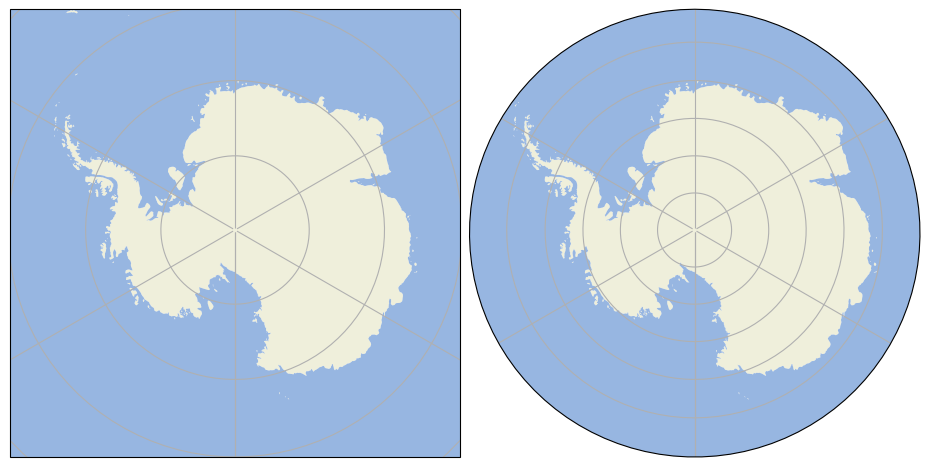

In [2]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def main():
    fig = plt.figure(figsize=[10, 5])
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                          sharex=ax1, sharey=ax1)
    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Limit the map to -60 degrees latitude and below.
    ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)

    ax1.gridlines()
    ax2.gridlines()

    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.OCEAN)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax2.set_boundary(circle, transform=ax2.transAxes)

    plt.show()


if __name__ == '__main__':
    main()

In [3]:
import torch
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 2080 SUPER'

In [4]:
import subprocess
subprocess.run(['python', '-m', 'cfgrib', 'selfcheck' ])


Found: ecCodes v2.24.2.
Your system is ready.


CompletedProcess(args=['python', '-m', 'cfgrib', 'selfcheck'], returncode=0)